# Question

In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib inline

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=['sepal_ln','sepal_wd','petal_ln','petal_wd','out_put'])
df.head()

,sepal_ln,sepal_wd,petal_ln,petal_wd,out_put
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x = df.loc[:,['sepal_ln','sepal_wd','petal_ln','petal_wd']]
x.head()

,sepal_ln,sepal_wd,petal_ln,petal_wd
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
x = df.loc[:,['sepal_ln','sepal_wd','petal_ln','petal_wd']].values


In [5]:
y = df.loc[:,['out_put']]
y.head()

,out_put
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [6]:
y = df.loc[:,['out_put']].values

In [7]:
pc = PCA(n_components=3)
prin_comp = pc.fit_transform(x)
new_df = pd.DataFrame(data = prin_comp, columns = ['X-axis','Y-axis','Z-axis'])

In [8]:
new_final_df = pd.concat([new_df, df[['out_put']]],axis=1)
new_final_df

,X-axis,Y-axis,Z-axis,out_put
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa
...,...,...,...,...
145,1.944017,0.187415,0.179303,Iris-virginica
146,1.525664,-0.375021,-0.120636,Iris-virginica
147,1.764046,0.078519,0.130784,Iris-virginica
148,1.901629,0.115877,0.722874,Iris-virginica


In [9]:
x_axis = new_final_df['X-axis']
y_axis = new_final_df['Y-axis']
z_axis = new_final_df['Z-axis']

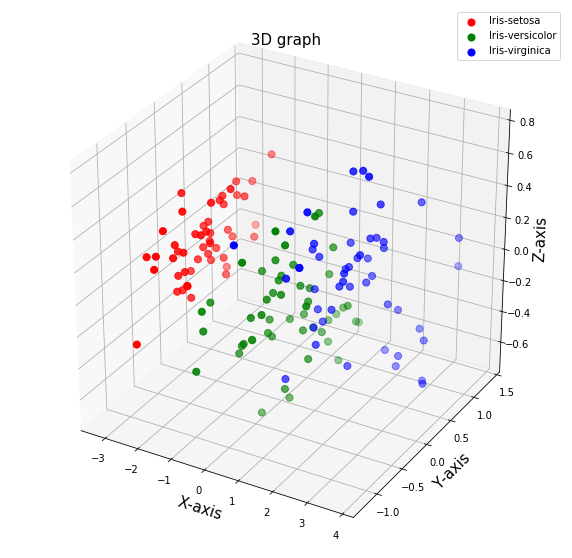

In [10]:
figure = plt.figure(figsize = (10,10))
f = figure.add_subplot(111, projection='3d')
f.set_xlabel('X-axis', fontsize = 15)
f.set_ylabel('Y-axis', fontsize = 15)
f.set_zlabel('Z-axis', fontsize = 15)
f.set_title('3D graph', fontsize = 15)

trgt = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
clr = ['r','g','b']
for t, c in zip(trgt,clr):
    ind = new_final_df['out_put'] == t
    f.scatter(new_final_df.loc[ind, 'X-axis']
               , new_final_df.loc[ind, 'Y-axis']
               ,new_final_df.loc[ind, 'Z-axis']
               , c = c
               , s = 50)

f.legend(trgt)
f.grid()